---
Assessment Repository

Task Assessment for Applied Statistics module on Higher Diploma in Science in Computing in Data Analytics at ATU.

Submitted by: Agnieszka Waszczuk Lecturer: Ian McLoughlin

---



### Task 1: Permutations and Combinations
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [39]:
# Importing 
import math
import pandas as pd
import os
import numpy as np

In [40]:
## Creating cups list represents a sequence of integers starting from 0 and ending at 6
cups = [0, 1, 2, 3, 4, 5, 6]

In [41]:
pnum = (8*7*6*5)/(4*3*2*1)
pnum

70.0

In [42]:
prob = (1/70)
print("The probability to select exactly the correct 4 out of 8 cups = ", prob, '%')

The probability to select exactly the correct 4 out of 8 cups =  0.014285714285714285 %


In [43]:
# The cup labels
labels = list(range(cups))

# Show
labels

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
# Function to calculate combinations (n choose k)
def comb(n, k):
    return math.comb(n, k)

# Total number of ways to choose 6 cups out of 12
total_outcomes = comb(12, 6)

# Probability of guessing all 6 cups correctly
correct_6 = 1 / total_outcomes

# Probability of guessing exactly 5 cups correctly (5 correct, 1 incorrect)
correct_5 = (comb(6, 5) * comb(6, 1)) / total_outcomes

# Probability of guessing at least 5 cups correctly (5 or 6 correct)
at_least_5_correct = correct_5 + correct_6

# Probability of guessing exactly 4 cups correctly (4 correct, 2 incorrect)
correct_4 = (comb(6, 4) * comb(6, 2)) / total_outcomes

# Probability of guessing at least 4 cups correctly (4, 5, or 6 correct)
at_least_4_correct = correct_4 + correct_5 + correct_6

# Output results
correct_6, at_least_5_correct, at_least_4_correct


(0.0010822510822510823, 0.04004329004329004, 0.28354978354978355)

---
### Task 2: numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [ ]:
# Imprting library 

# Random selection 
# https://numpy.org/doc/stable/reference/?v=20241021203608
import numpy as np

# Building distributions
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Plotting 
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as plt

In [ ]:
# Normal distribution
mean = 10.0
std_dev = 3.0
sample_size = 100000

In [ ]:
# Sample using numpy's normal function
sample = np.random.normal(mean, std_dev, sample_size)

In [ ]:
# Creating Shapiro-Wilk test for normality
# https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
shapiro_test = stats.shapiro(sample)

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Printing result 
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
print(f"p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test Statistic: 0.9999873661402134
p-value: 0.9961861769313631


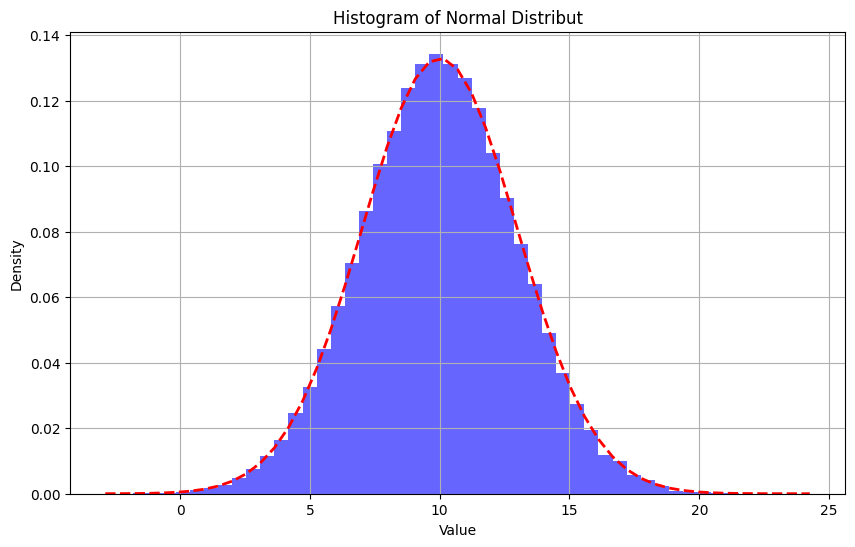

In [ ]:
# Plot a histogram 
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(sample, bins=50, density=True, alpha=0.6, color='b')

# Plot normal distribution 
pdf = stats.norm.pdf(bins, mean, std_dev)
plt.plot(bins, pdf, 'r--', linewidth=2)

# Adding labels and title
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
# Adding grid 
plt.grid()
# Display the plot
plt.show()

p-value: 0.99999 — very high 

---
#### Task 3: t-Test Calculation
Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

Patient ID	0	1	2	3	4	5	6	7	8	9
Before	63	68	70	64	74	67	70	57	66	65
After	64	64	68	64	73	70	72	54	61	63
Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

In [8]:
# Import libraries
# https://numpy.org/doc/stable/reference/?v=20241021203608

import numpy as np
from scipy import stats

# Import plotting
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns


#### Define the data for both "before" and "after" measurements

In [ ]:
# Resting heart rates before and after on two-week exercise program.
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

# Calculateting the differences.
differences = before - after

In [ ]:
# Calcutateing mean.
# https://en.wikipedia.org/wiki/Mean
mean_diff = np.mean(differences)


In [ ]:
# Standard deviation of the differences.
# https://numpy.org/doc/stable/reference/generated/numpy.std.html

std_diff = np.std(differences, ddof=1)

In [ ]:
#Calculate the sample size. 
#https://datagy.io/python-confidence-intervals/
n = len(differences)


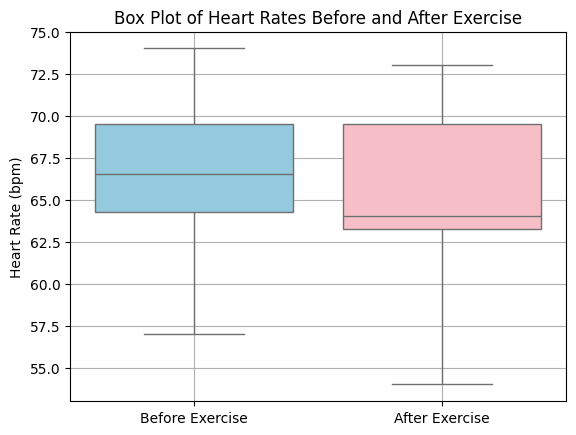

In [17]:
# Box plot.
sns.boxplot(data=[before, after],  palette=["skyblue", "lightpink"]);

# Add title.
plt.title('Box Plot of Heart Rates Before and After Exercise')

# Add lable.
plt.ylabel('Heart Rate (bpm)')
plt.xticks([0, 1], ['Before Exercise', 'After Exercise'])

# Add grid.
plt.grid(True)

# Show. 
plt.show()

#### $t$-Test 



In [ ]:
# Perform a t-test.
stats.ttest_ind(before, after)

TtestResult(statistic=np.float64(0.4740968275126808), pvalue=np.float64(0.6411310132871086), df=np.float64(18.0))

##### The $t$-statistic of 0.474 suggests that the difference between groups before and  gropu after is quite small

In [ ]:

# Calculate the t-statistic. 
# https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests
t_statistic = mean_diff / (std_diff / np.sqrt(n))

#### Results of the calculations

In [ ]:

# Printing results for t-statistic.
print("t-statistic:", t_statistic)

# Printing results for p-alue.
print("p-value:", p_value)


t-statistic: 1.3372274824806283
p-value: 0.21396011317404623


---
#### Task 4: ANOVA
In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

In [2]:
# Import libraries.
import numpy as np
from scipy.stats import f_oneway

# Plotting. 
import matplotlib as plt

# Statistic function. 
import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# First sample.
sample_1 = np.random.normal(loc=4.9, scale=0.1, size=100)

# Second sample. 
sample_2 = np.random.normal(loc=5.0, scale=0.1, size=100)

# Third sample.
sample_3 = np.random.normal(loc=5.1, scale=0.1, size=100)

### Histogram

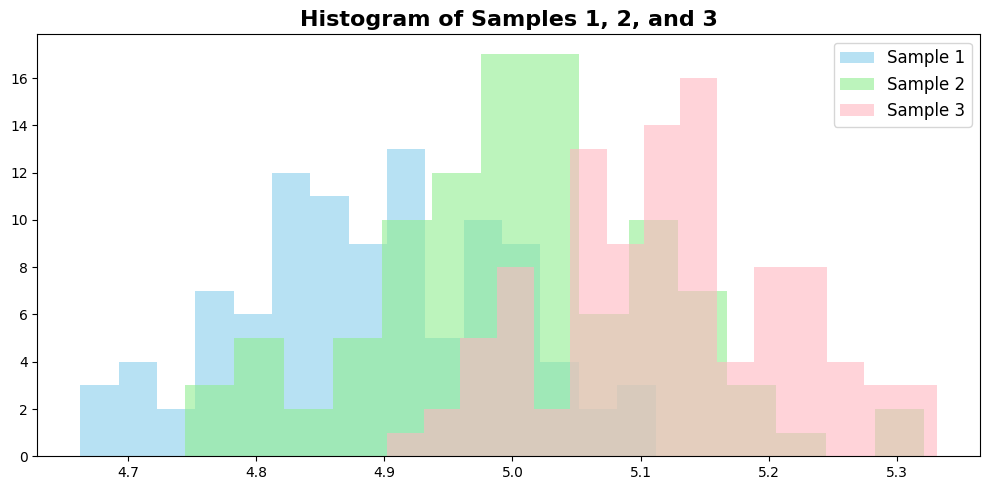

In [ ]:
# Create the histogram.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_1, bins=15, alpha=0.6, label='Sample 1', color='skyblue')

# Histogram of the second sample.
ax.hist(sample_2, bins=15, alpha=0.6, label='Sample 2', color='lightgreen')

# Histogram of the third sample.
ax.hist(sample_3, bins=15, alpha=0.6, label='Sample 3', color='lightpink')

# Add title.
ax.set_title('Histogram of Samples 1, 2, and 3', fontsize=16, fontweight='bold')

# Add legend.
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()

In [6]:
# t-test on sample_1 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)


t_statistic, p_value

(np.float64(-7.596199082039298), np.float64(1.1838760325672534e-12))

In [ ]:
# t-test on sample_1 and sample_3.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_3)


t_statistic, p_value

(np.float64(-16.931219820473697), np.float64(2.3802785785656154e-40))

In [9]:
# t-test on sample_1 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)


t_statistic, p_value

(np.float64(-7.596199082039298), np.float64(1.1838760325672534e-12))

In [8]:
# t-test on sample_3 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_3, sample_2)


t_statistic, p_value

(np.float64(8.115199393587266), np.float64(5.041849413380694e-14))

$s$-Sample

In [11]:
# Number of samples.
n = 10000

In [ ]:
# https://www.datacamp.com/tutorial/anova-test
# https://www.scribbr.com/statistics/type-i-and-type-ii-errors/
# https://www.youtube.com/watch?v=EWYzeZbchR0